Audio data shape: (661504,)
Sampling Rate: 22050


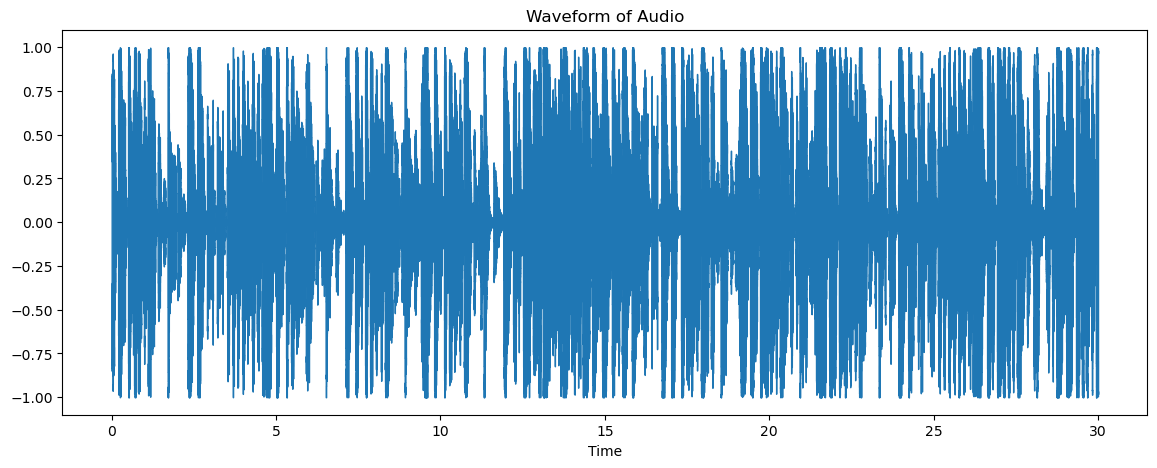

In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to an example audio file
audio_path = "genres/hiphop/hiphop.00006.au"   # Fixed to .au

# Load the audio file
y, sr = librosa.load(audio_path)

# Print details
print("Audio data shape:", y.shape)
print("Sampling Rate:", sr)

# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.show()


MFCC shape (coefficients x time frames): (40, 1293)


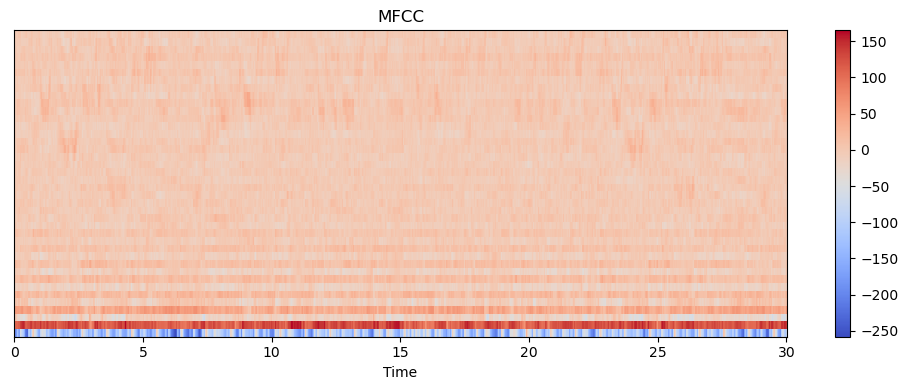

In [28]:
import numpy as np

# Load audio file (same as before)
audio_path = "genres/blues/blues.00000.au"
y, sr = librosa.load(audio_path)

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print("MFCC shape (coefficients x time frames):", mfcc.shape)

# Visualize MFCCs
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [29]:
import os
import numpy as np
import librosa

data = []
labels = []
genres = []

# Collect genre names
for genre in os.listdir("genres"):
    genres.append(genre)

print("Genres:", genres)

# Loop through all genres and files
for genre in genres:
    genre_path = os.path.join("genres", genre)
    
    for filename in os.listdir(genre_path):
        if filename.endswith(".au"):
            file_path = os.path.join(genre_path, filename)

            # Load audio
            y, sr = librosa.load(file_path)

            # Extract MFCC
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

            # Take mean of MFCC across time to make fixed length feature
            mfcc_mean = np.mean(mfcc, axis=1)

            data.append(mfcc_mean)
            labels.append(genre)

print("Finished processing all files.")
print("Total samples:", len(data))


Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Finished processing all files.
Total samples: 1000


In [30]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert list to numpy array
X = np.array(data)
y = np.array(labels)

print("X shape (features):", X.shape)
print("y shape (labels):", y.shape)

# Encode labels to numbers (blues → 0, classical → 1, etc.)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded labels:", y_encoded[:10])


X shape (features): (1000, 40)
y shape (labels): (1000,)
Encoded labels: [0 0 0 0 0 0 0 0 0 0]


In [31]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 800
Validation samples: 200


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # number of genres
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/50


C:\Users\raman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2040 - loss: 7.0859 - val_accuracy: 0.2550 - val_loss: 3.0192
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3978 - loss: 2.1652 - val_accuracy: 0.3450 - val_loss: 2.2552
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4758 - loss: 1.5555 - val_accuracy: 0.4200 - val_loss: 1.8546
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5949 - loss: 1.2106 - val_accuracy: 0.4850 - val_loss: 1.8726
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5767 - loss: 1.2397 - val_accuracy: 0.5100 - val_loss: 1.5904
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6428 - loss: 1.0293 - val_accuracy: 0.4850 - val_loss: 1.7410
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6178 - loss: 1.1306 - val_accuracy: 0.4900 - val_loss: 1.6802
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6489 - loss: 1.0552 - val_accuracy: 0.5300 - val_loss: 1.6603
Epo

In [33]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5327 - loss: 1.5423 
Validation Accuracy: 0.5099999904632568


In [34]:
model.save("music_genre_model.h5")
print("Saved!")


Saved!


In [35]:
model.save("music_genre_model.keras")
print("Saved!")


Saved!


In [36]:
from keras.models import load_model

model = load_model("music_genre_model.keras")
print("Model loaded successfully!")


Model loaded successfully!


C:\Users\raman\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("music_genre_model.keras")

# Genre labels
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop',
                'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load and preprocess audio (correct way for mean MFCC model)
def preprocess_audio(audio_path):
    y, sr = librosa.load(audio_path, duration=30, dtype=np.float32)

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # Take mean over time → output shape will be (40,)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    # Reshape to (1, 40) to match input
    return mfcc_mean.reshape(1, 40)

# Predict
audio_path = "genres/hiphop/hiphop.00006.au"  # change to your test file
mfcc_input = preprocess_audio(audio_path)
prediction = model.predict(mfcc_input)
predicted_class = np.argmax(prediction)
predicted_genre = genre_labels[predicted_class]

print("Predicted Genre:", predicted_genre)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Genre: hiphop
